# HOTEL BOOKINGS PROJECT

# 1.00 Introduction

Peoples income is the amount of money they receive from various life engagements. This amount of money can be affected by various factors such as economy, inflation, nature of work that is engaged in etc. This project is therefore designed to predict the income of individuals given various conditions and situations. This work is capable of helping individuals in the management of their hard-earned income so as to derive maximum value from it. 

# 2.00 Problem Statement

This project has a goal of developping a machine laerning model predicts whether an individual's  income exceeds 50k based on demographic and employment-related features. The dataset has age, workclass, educational level, marital-status, occupation, realationship, race, sex, capital gain, capital loss, hours worked per week and native country as its features. The primary challenge is to develop a model that is robust against the class imbalance in the dataset and also can accurately classify income levels to aid in policy making, business decisions and social research. 

# 3.00 Research Questions


1. How does the imbalance in the income classes affect the performance of various machine learning models, and how will the imbalance effect be mitigated?
2. What is the optimal combination of feature selection and resampling techniques to enhance model performance?
3. Can visualizing the data provide actionable insights into income distribution across different demographic and employment-related groups?

# 4.00 Aim and Objectives

### I. Aim

To develop a model will predict whether a hotel room bookong will be cancelled

### II. Objectives

I. To evaluate the performance of various models for the classification project.

II. To visualize the relationship among the various features in the dataset.

# 5.00 Data Collection and Preparation

### I. Importing Libraries and Modules

In [3]:
# importing various modules, libries and classes essential to this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### II. Data Importation

In [4]:
# importing the dataset using the read_csv function
data = 'hotel_bookings.csv'

# reading file into dataframe
df = pd.read_csv(data)

# 6.00 Initial Data Inspection

Preliminary inspection of the dataset is carried-out. it is done to have an initial insight into the data before the deeper exploratory data analysis. 

### I.  Dataset Overview

In [5]:
# Displaying the dataset head
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Displaying information about the Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Displaying sample of the Dataset 
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29719,Resort Hotel,0,0,2016,November,45,3,0,1,2,...,No Deposit,240.0,NaN,0,Transient,75.0,0,0,Check-Out,2016-11-04
25051,Resort Hotel,0,5,2016,June,24,11,0,1,1,...,No Deposit,250.0,NaN,0,Transient,148.5,0,0,Check-Out,2016-06-12
86054,City Hotel,0,41,2016,March,13,24,0,3,2,...,No Deposit,9.0,NaN,0,Transient-Party,117.6,0,0,Check-Out,2016-03-27


### II. Discriptive statistics of the Dataset

In [8]:
# Displaying the descriptive statics of the  Dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### III. Checking for Duplicates in the Dataset

In [9]:
# checking for duplicates
df.duplicated().sum()

31994


### IV. Checking for Missing Values in the Dataset

In [10]:
# Displaying missing values in the Dataset 
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### V. Other Characteristics of the Dataset

In [11]:
# Displaying the value counts of 'income'
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [12]:
 # Displaying the value counts of 'workclass'
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [13]:
# Displaying the value counts of 'marital-status'
df['marital-status'].value_counts()

KeyError: 'marital-status'

In [12]:
# Displaying the value counts of 'occupation'
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
# Displaying the value counts of 'relationship'
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [14]:
# Displaying the value counts of 'race'
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [15]:
# Displaying the value counts of 'sex' 
df['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [16]:
# Displaying the value counts of 'native-country'
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

# 7.00 Exploratory Data Analysis (EDA)

### I. General Information on the Dataset

In [28]:
# Displaying information on the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
# Displaying the shape of the Dataset
df.shape

(119390, 32)

In [30]:
# Displaying the Data types of the Dataset
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [31]:
# Displaying the size of the Dataset
df.size

3820480

### II. Discriptive statistics

In [32]:
# Displaying the descriptive statistics of the Dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### III. Checking for Class imbalances in the Dataset 

The presence of class imbalance has been detected. with <=50k having 37155 while >50k has only 11687.

In [33]:
df['income'].value_counts()

KeyError: 'income'

### IV. Insights from the Dataset

1. Income Distribution by Education Level: According to the dataset HS-grad has the highest number of people with income <=50k, while those with Bachelor degree lead in >50k income.

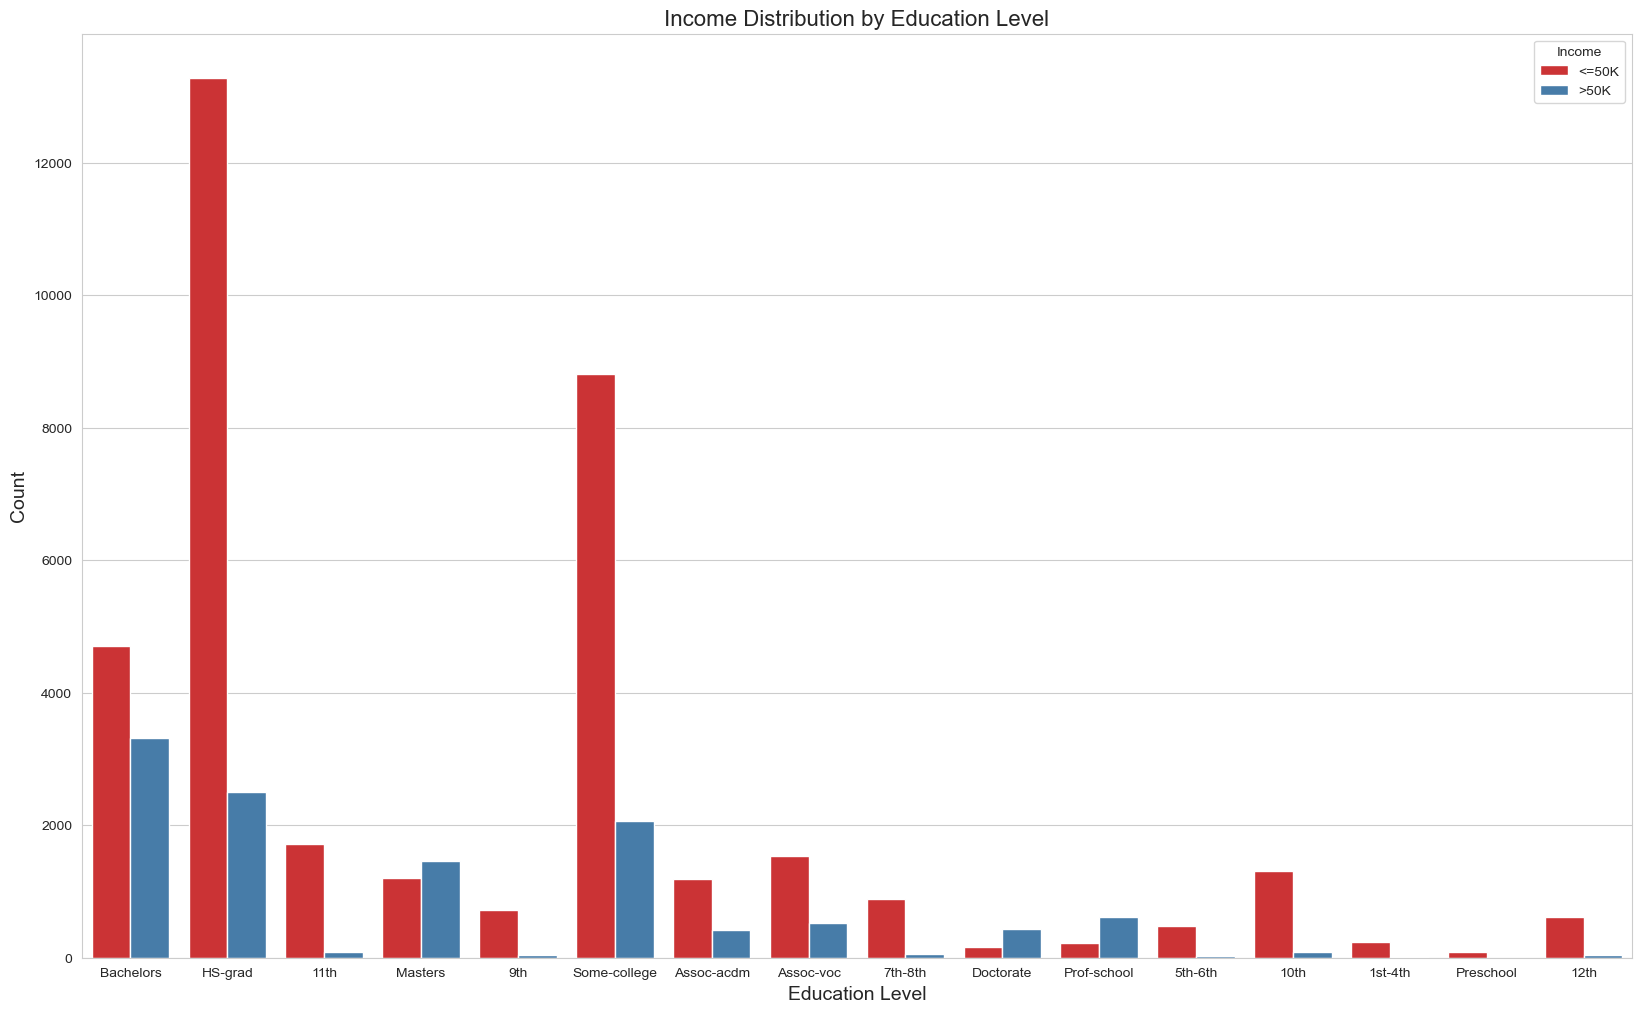

In [23]:
# 1. Income Distribution by Education Level
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
sns.countplot(data=df, x='education', hue='income', palette='Set1')
plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income')
plt.show()

2. Income Distribution by Age:  As displayed below, there are more people aged 35-40 that are earning <=50k than those within the same age range that are earning >50k in the dataset.

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


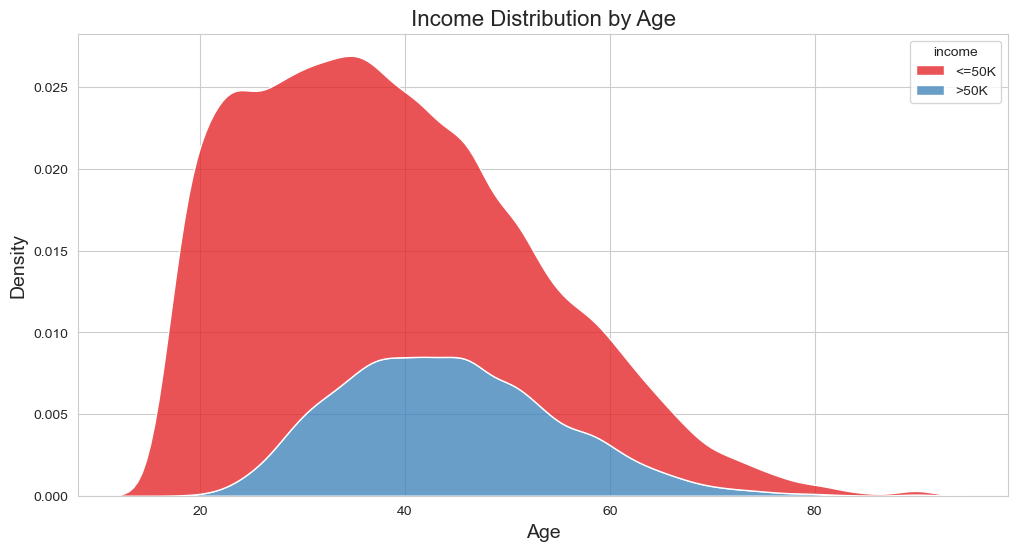

In [24]:
# 2. Income Distribution by Age
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='age', hue='income', multiple='stack', palette='Set1')
plt.title('Income Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()
plt.show()

3. Income Distribution by Workclass: those earning <=50k are the majority and are mostly concentrated in the 'private' workclass.

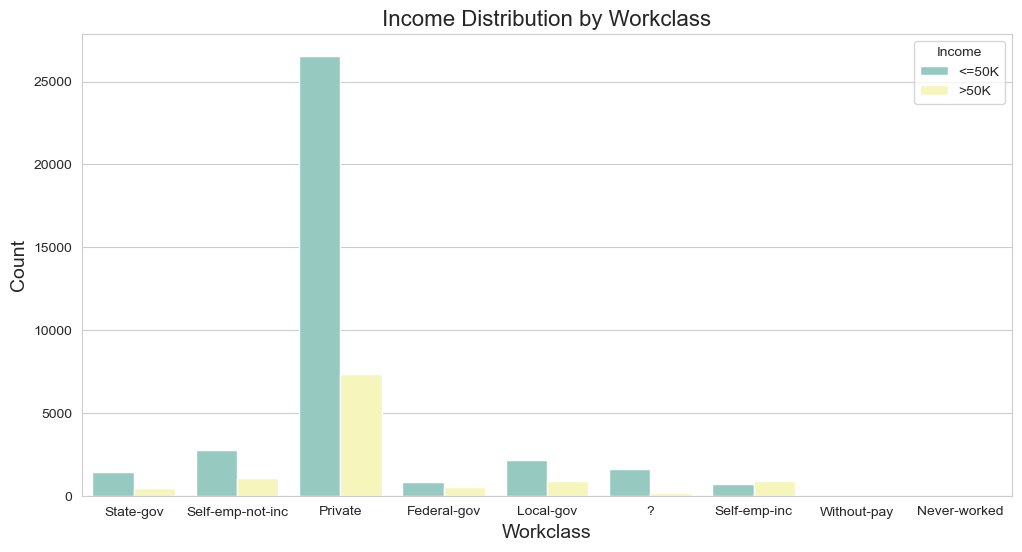

In [25]:
# 3. Income Distribution by Workclass
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='income', palette='Set3')
plt.title('Income Distribution by Workclass', fontsize=16)
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income')
plt.show()

4. Income Distribution by Hours per Week: This shows how hours-per-week influence income gain. 

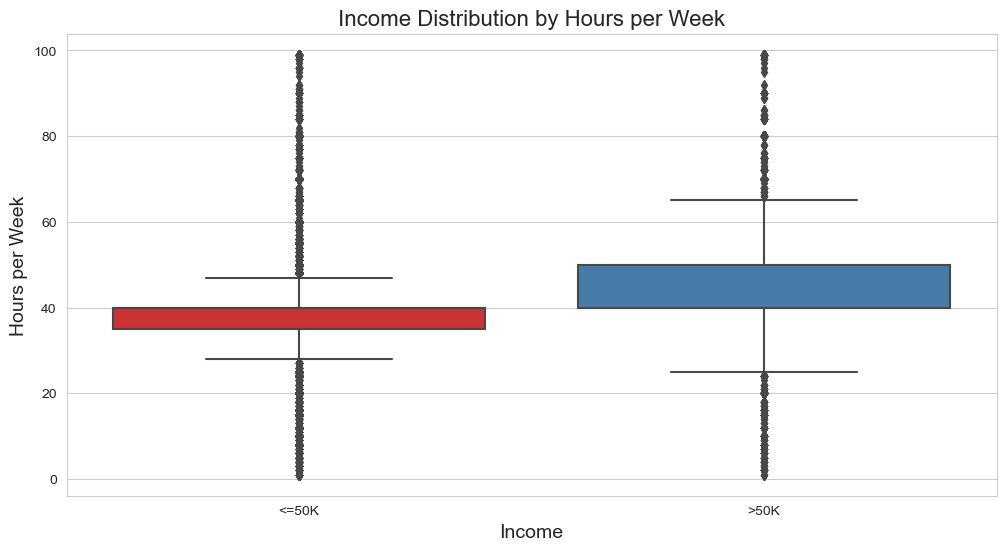

In [26]:

# 4. Income Distribution by Hours per Week
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', palette='Set1')
plt.title('Income Distribution by Hours per Week', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Hours per Week', fontsize=14)
plt.show()

# 8.00 Data Preprocessing and Feature Engineeering

### I. Dropping Irrelevant Features from the Dataset

Relevant features contribute to the prediction while irrelevant features contribute noise, bias and redundancy in a model. Therefore removing these irrelevant features from a dataset is very essential. The following features were removed due to various reasons outlined.

1. fnlwght(final weight): is a census-based feature and is not directly related to predicting income.

2. education: is a categorical version of education-num. keeping both creates redundancy.

3. Relationship: This can be redundant because the inclusion of marital-status and might introduce bias.

4. Native-country: This is usually less relevant and can intriduce bias unless theirs a specific hypothesis one is testing related to country of origin.

In [27]:
# Dropping irrelevant features from the dataset
df = df.drop(['fnlwgt', 'education', 'relationship', 'native-country'], axis=1)

# Displaying the new dataframe
display(df)

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,White,Female,0,0,36,<=50K
48838,64,NaN,9,Widowed,NaN,Black,Male,0,0,40,<=50K
48839,38,Private,13,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,<=50K
48840,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,<=50K


### II. Handling Missing Values

In [15]:
# Displaying missing values in the dataset
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
# instantiating simpleimputer
imputer = SimpleImputer(strategy='most_frequent')

# fitting and transforming the features concerned
df[['country', 'agent', 'company', 'children']] = imputer.fit_transform(df[['country', 'agent', 'company', 'children']])

In [17]:
# Verifying the imputer process
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### III. Handling Duplicates in the Dataset

In [18]:
# Checking for Duplicates in the Dataset
df.duplicated().sum()

32014

In [19]:
# Dropping Duplicates
df = df.drop_duplicates()

In [20]:
# Verifying the drop duplicates process
df.duplicated().sum()

0

### IV. Seperation of Dataset into Features (X) and Label (y)

In [21]:
# Seperating dataset into features (X) 
X = df.drop(['is_canceled'], axis=1)

# Seperating dataset into label (y) 
y = df['is_canceled']

### V. Encoding Categorical Variables

 Encoding Features (X)

In [22]:
# Instantiating OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# columns to encode
cat_features = df.select_dtypes(exclude=np.number).columns.tolist()

# fit and transforming the features
encoded_features = encoder.fit_transform(X[cat_features])

# Creating dataframe for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns= encoder.get_feature_names_out(cat_features))

# Resetting the index of the new dataframe of encoded features
encoded_df.reset_index(drop=True, inplace=True)

# Resetting the index of X 
X.reset_index(drop=True, inplace=True)

# Concatnating the encoded dataframe and X 
df_encoded = pd.concat([X.drop(cat_features, axis=1), encoded_df], axis=1)

# Passing the new marged dataframe to X
X = df_encoded

# Displaying X
display(X)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,342,2015,27,1,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,737,2015,27,1,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2015,27,1,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,2015,27,1,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,2015,27,1,0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87371,23,2017,35,30,2,5,2,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87372,102,2017,35,31,2,5,3,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87373,34,2017,35,31,2,5,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87374,109,2017,35,31,2,5,2,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [23]:
selector = VarianceThreshold(threshold=.2)

In [ ]:
x_new = selector.fit_transform(X,y)

### VI. Features Scaling

In [38]:
# instantiating standardscaler
scaler = StandardScaler()

# fit and transforming (y)
scaled_X = scaler.fit_transform(X)

# Creating dataframe for the scaled features
X = pd.DataFrame(scaled_X, columns= X.columns)

# Displaying X
display(X)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.072005,1.072578,0.107751,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,-1.428786,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
1,0.725728,1.072578,-0.158988,-0.239542,-2.113623,-0.188863,-0.282405,-0.015783,-1.428786,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
2,-0.144526,-0.412034,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
3,0.943291,-1.154340,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,2.861278,-0.101064,-2.228017,0.709631
4,-0.869737,1.072578,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,2.328493,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,2.861278,-0.101064,-2.228017,-1.409184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,0.580685,1.443732,-0.158988,-0.239542,-0.058044,-0.188863,3.541013,-0.015783,-1.428786,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
40152,-0.072005,1.072578,-0.158988,-0.239542,-0.362574,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,2.328493,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,-1.409184
40153,1.741023,-0.412034,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,2.328493,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,2.861278,-0.101064,-2.228017,0.709631
40154,0.290601,1.072578,0.510314,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,5.101263,-0.349494,-0.101064,-2.228017,0.709631


In [40]:
# instantiating LabelEncoder
lab_encoder = LabelEncoder()

# fit and transforming (y)
y_encoded = lab_encoder.fit_transform(y)

# Passing encoded y to y
y = y_encoded

# Displaying y
display(y)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Features Scaling


In [41]:
# instantiating standardscaler
scaler = StandardScaler()

# fit and transforming (y)
scaled_X = scaler.fit_transform(X)

# Creating dataframe for the scaled features
X = pd.DataFrame(scaled_X, columns= X.columns)

# Displaying X
display(X)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.072005,1.072578,0.107751,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,-1.428786,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
1,0.725728,1.072578,-0.158988,-0.239542,-2.113623,-0.188863,-0.282405,-0.015783,-1.428786,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
2,-0.144526,-0.412034,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
3,0.943291,-1.154340,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,2.861278,-0.101064,-2.228017,0.709631
4,-0.869737,1.072578,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,2.328493,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,2.861278,-0.101064,-2.228017,-1.409184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,0.580685,1.443732,-0.158988,-0.239542,-0.058044,-0.188863,3.541013,-0.015783,-1.428786,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,0.709631
40152,-0.072005,1.072578,-0.158988,-0.239542,-0.362574,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,2.328493,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,-0.349494,-0.101064,0.448830,-1.409184
40153,1.741023,-0.412034,-0.158988,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,2.328493,-0.1544,-0.355877,-0.183566,-0.230088,-0.196030,2.861278,-0.101064,-2.228017,0.709631
40154,0.290601,1.072578,0.510314,-0.239542,-0.058044,-0.188863,-0.282405,-0.015783,0.699895,-0.206480,...,-0.429462,-0.1544,-0.355877,-0.183566,-0.230088,5.101263,-0.349494,-0.101064,-2.228017,0.709631


### VII. Dimensionality Reduction

In [42]:
# instantiating Principal Component Analysis (PCA)
pca = PCA(n_components=0.95) # to retain 95% variance after features reduction.  

# fitting (X)
pca.fit(X)

PCA(n_components=0.95)

# 9.00 Model Development

### I. Train-Test-Split

In [47]:
# Seperating X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### II. Model Selection and Training

**Logistic Regression**

In [49]:
# instantiating Logistic Regression
log_reg = LogisticRegression()

# fitting the training datasets
log_reg.fit(X_train, y_train)

# testing the model
log_pred = log_reg.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, log_pred))
print(f1_score(y_test, log_pred))
print(accuracy_score(y_test, log_pred))
print(recall_score(y_test, log_pred))
print(precision_score(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5906
           1       0.73      0.58      0.65      2126

    accuracy                           0.83      8032
   macro avg       0.79      0.75      0.77      8032
weighted avg       0.82      0.83      0.83      8032

0.6475495307612096
0.8316733067729084
0.5841956726246472
0.7263157894736842


**Decision Tree**

In [50]:
# instantiating Decision Tree Classifier
tree = DecisionTreeClassifier()

# fitting the training datasets
tree.fit(X_train, y_train)

# testing the model
tree_pred = tree.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, tree_pred))
print(f1_score(y_test, tree_pred))
print(accuracy_score(y_test, tree_pred))
print(recall_score(y_test, tree_pred))
print(precision_score(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5906
           1       0.61      0.59      0.60      2126

    accuracy                           0.79      8032
   macro avg       0.73      0.73      0.73      8032
weighted avg       0.79      0.79      0.79      8032

0.6032049748863908
0.7934511952191236
0.5931326434619003
0.613625304136253


**K-Nearest Neighbors**

In [51]:
# instantiating K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# fitting the training datasets
knn.fit(X_train, y_train)

# testing the model
knn_pred = tree.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, knn_pred))
print(f1_score(y_test, knn_pred))
print(accuracy_score(y_test, knn_pred))
print(recall_score(y_test, knn_pred))
print(precision_score(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5906
           1       0.61      0.59      0.60      2126

    accuracy                           0.79      8032
   macro avg       0.73      0.73      0.73      8032
weighted avg       0.79      0.79      0.79      8032

0.6032049748863908
0.7934511952191236
0.5931326434619003
0.613625304136253


**Support Vector Machine**

In [55]:
# instantiating Support Vector Machine Classifier
svm = SVC()

# fitting the training datasets
svm.fit(X_train, y_train)

# testing the model
svm_pred = svm.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, svm_pred))
print(f1_score(y_test, svm_pred))
print(accuracy_score(y_test, svm_pred))
print(recall_score(y_test, svm_pred))
print(precision_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5906
           1       0.75      0.57      0.65      2126

    accuracy                           0.84      8032
   macro avg       0.80      0.75      0.77      8032
weighted avg       0.83      0.84      0.83      8032

0.6490525753936482
0.8362798804780877
0.5719661335841957
0.7501542257865516


**AdaBoost**

In [57]:
# instantiating AdaBoost Classifier
ada = AdaBoostClassifier()

# fitting the training datasets
ada.fit(X_train, y_train)

# testing the model
ada_pred = ada.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, ada_pred))
print(f1_score(y_test, ada_pred))
print(accuracy_score(y_test, ada_pred))
print(recall_score(y_test, ada_pred))
print(precision_score(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5906
           1       0.76      0.61      0.67      2126

    accuracy                           0.84      8032
   macro avg       0.81      0.77      0.78      8032
weighted avg       0.84      0.84      0.84      8032

0.6720626631853787
0.8436254980079682
0.6053621825023519
0.7552816901408451


**Gradient Booster**

In [58]:
# instantiating Gradient Boost Classifier
gb = GradientBoostingClassifier()

# fitting the training datasets
gb.fit(X_train, y_train)

# testing the model
gb_pred = gb.predict(X_test)

# printing evaluation metrics
print(classification_report(y_test, gb_pred))
print(f1_score(y_test, gb_pred))
print(accuracy_score(y_test, gb_pred))
print(recall_score(y_test, gb_pred))
print(precision_score(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5906
           1       0.79      0.59      0.67      2126

    accuracy                           0.85      8032
   macro avg       0.83      0.77      0.79      8032
weighted avg       0.84      0.85      0.84      8032

0.674932614555256
0.8498505976095617
0.5888993414863594
0.7904040404040404


# 10.00 Hyperparameter Tuning

**Using Grid Search CV**

**Logistic Regression**

In [ ]:
param_grid_log_reg = {"C" : [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', 'NONE'], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter' : [100, 200, 300]}

grid_search_log_reg = GridSearchCV(estimator= LogisticRegression(), param_grid = param_grid_log_reg,cv=5, n_jobs=-1, scoring='accuracy')

grid_search_log_reg.fit(X_train, y_train)

print(f'Best parameter found for Logistic Regression;{grid_search_log_reg.best_params_}')
print(f'Best cross-validation score: {round(grid_search_log_reg.best_score_, 2)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
975 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Best parameter found for Logistic Regression;{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8390610841639571


**Decision Tree**

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_tree = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid = param_grid_tree, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_tree.fit(X_train, y_train)

print(f'Best parameter found for Decision Tree;{grid_search_tree.best_params_}')
print(f'Best cross-validation score: {round(grid_search_tree.best_score_,2)}')

Best parameter found for Decision Tree;{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score: 0.8510147452888244


**K-Nearest Neighbors**

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid = param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print(f'Best parameter found for K-Nearest Neighbors ;{grid_search_knn.best_params_}')
print(f'Best cross-validation score: {round(grid_search_knn.best_score_,2)}')

Best parameter found for K-Nearest Neighbors ;{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.8182666217637168


**Support Vector Machine**


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid_search_svm = GridSearchCV(estimator= SVC(), param_grid = param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_svm.fit(X_train, y_train)

print(f'Best parameter found for Support Vector Machine ;{grid_search_svm.best_params_}')
print(f'Best cross-validation score: {round(grid_search_svm.best_score_,2)}')

Best parameter found for Support Vector Machine ;{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.84


**AdaBoost**


In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(estimator= AdaBoostClassifier(), param_grid = param_grid_ada, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_ada.fit(X_train, y_train)

print(f'Best parameter found for AdaBoost ;{grid_search_ada.best_params_}')
print(f'Best cross-validation score: {round(grid_search_ada.best_score_,2)}')

Best parameter found for AdaBoost ;{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 500}
Best cross-validation score: 0.86


**Gradient Boosting**

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_gb = GridSearchCV(estimator= GradientBoostingClassifier(), param_grid = param_grid_gb, cv=5, n_jobs=-1, scoring='accuracy')

grid_search_gb.fit(X_train, y_train)

print(f'Best parameter found for Gradient Boosting ;{grid_search_gb.best_params_}')
print(f'Best cross-validation score: {round(grid_search_gb.best_score_,2)}')

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best parameter found for Gradient Boosting ;{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500, 'subsample': 1.0}
Best cross-validation score: 0.87


# 11.00 Model Evaluation

### Selected Model
**Gradient Booster** is the model with the highest best Grid search cross-validation score of 0.87 and is therefore selected for this classication task.

### I. Model Testing

In [48]:
# Instantiating the GradientBoostingClassifier using the best parameters from grid search
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='auto', min_samples_leaf=1, min_samples_split=20, n_estimators=500, subsample=1.0)

# fitting gb to the training dataset
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

C:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

### II. Evaluation metrics

**ROC Curve and AUC Score**

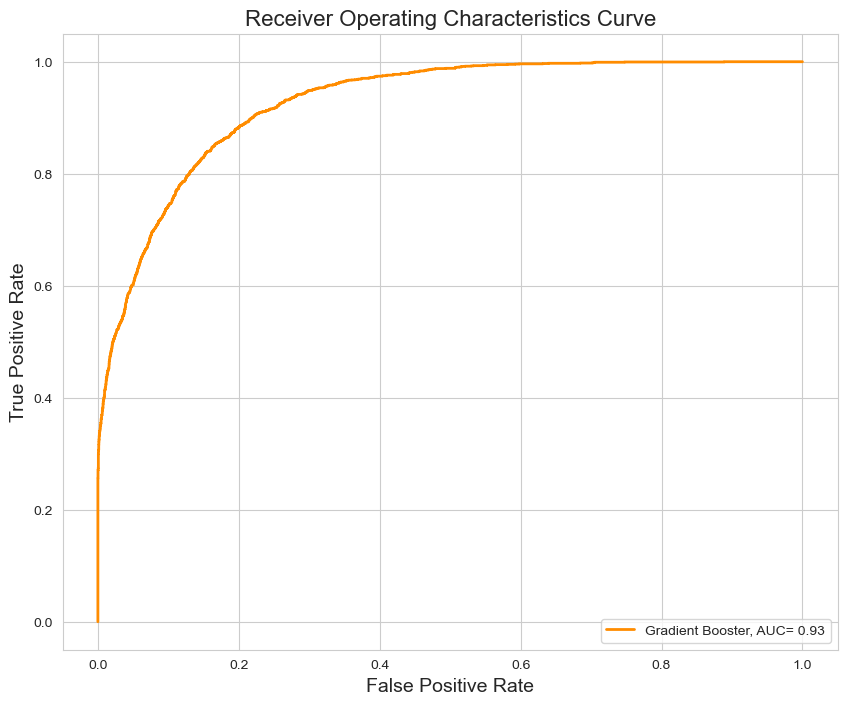

In [91]:
# roc curve for XGBoost
gb_proba = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,gb_proba)

# auc for XGBoost
auc_score = auc(fpr,tpr)

#plotting roc_curve for XGBoost
plt.figure(figsize=(10, 8))
plt.plot(fpr,tpr, color='darkorange',lw=2, label= f"Gradient Booster, AUC= {round(auc_score,2)}")
plt.title('Receiver Operating Characteristics Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')

**Confusion Matrix**

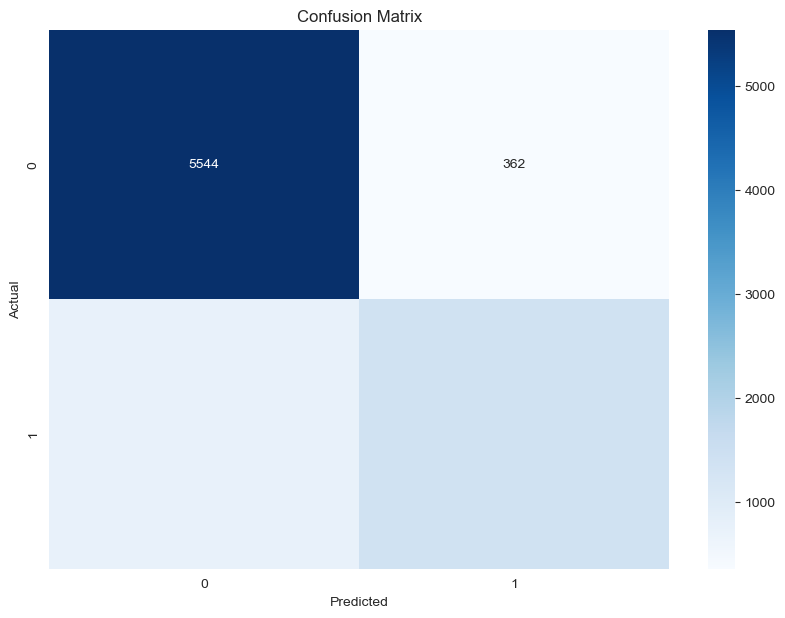

In [89]:
# Confusion matrix for Gradient Booster
cm = confusion_matrix(y_test, gb_pred, labels=gb.classes_ )

# Printing Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lab_encoder.classes_,yticklabels=lab_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Accuracy Score**


In [76]:
# Accuracy score for Gradient Booster
accuracy = accuracy_score(y_test,gb_pred)

# Printing accuracy score
print(f"Gradient Booster Accuracy: {round(accuracy,2)}")

Gradient Booster Accuracy: 0.86


**Precision Score**

In [77]:
# Precision score for Gradient Booster
precision = precision_score(y_test,gb_pred)

# Printing Precision score
print(f"Gradient Booster Precision score: {round(precision,2)}")

Gradient Booster Precision score: 0.79


**F1 Score**

In [78]:
# F1 score for Gradient Booster
f1 = f1_score(y_test,gb_pred)

# Printing F1 score
print(f"Gradient Booster F1 score: {round(f1,2)}")

Gradient Booster F1 score: 0.71


**Recall Score**

In [79]:
# Recall score for Gradient Booster
recall = recall_score(y_test,gb_pred)

# Printing Recall score
print(f"Gradient Booster Recall score: {round(recall,2)}")

Gradient Booster Recall score: 0.65


**Classification Report**

In [82]:
# Classification report for Gradient Booster
Class_report = classification_report(y_test,gb_pred)

# Printing Classification report
print(f"Gradient Booster Classification report: {(Class_report)}")

Gradient Booster Classification report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5906
           1       0.79      0.65      0.71      2126

    accuracy                           0.86      8032
   macro avg       0.84      0.79      0.81      8032
weighted avg       0.86      0.86      0.86      8032



# 12.00 Summary and Conclusion 

### I. Summary

The following is the summary of key processes carried-out in this project:

**Insght from Exploratory Data Analysis**
i. Income Distribution by Education Level: According to the dataset HS-grad has the highest number of people with income <=50k, while those with Bachelor degree lead in >50k income.

ii. Income Distribution by Age:  As displayed below, there are more people aged 35-40 that are earning <=50k than those within the same age range that are earning >50k in the dataset.

iii. Income Distribution by Workclass: those earning <=50k are the majority and are mostly concentrated in the 'private' workclass.

**Model Performance**
The model has an accuracy of .86 which is high. But accuracy cannot be relied upon because of the inherent class imbalance in the dataset. One metric that can be relied upon is the roc-auc which is about 0.93 this particular matric can say it all about the model performance. It indicates the models robustness across all thresholds.

With a gridsearch cross-validation  accuracy score of .87 which is based on the training data and the test accuracy which is .86 as obtained after the grid search, indicates that the model is not overfitting. Other mtrics that are indicating the good performance of the model include f1 score= 0,71 which is the trade-off between precision and recall, precision= 0.79 which is and indication of the models ability to make true predictions. Recall got a score of .65

Based on these metrics, the model has very high abilty to classify and generalise income across the individuals. 

### II. Conclusion

Overall this project has achieved its objectives of developing a robust model that can generalise on a new data. a high roc-auc of .93 is the metric that indicates this development. also the negligible difference between the training accuracy and that of the testing accuracy indicates no overfitting in the model allowing the model to generalise on new dataset.

# 13.00 Recommendation

Based on the perfaormace of the model, the following is recommended.

i. The features in the dataset that can contribute to the predictive powers of the model should be increased.

ii. Much attention should be given during data collection in order to collect a more quality data.  